# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                        profile                          
{'name': 'main', 'type': 'function'}        40645607      1  regionprofile   
                                            131479735     1  regionprofile   
                                            208948784     1  regionprofile   
                                            349824982     1  regionprofile   
                                            576323800     1  regionprofile   
                                            664388523     1  regionprofile   
                                            686307658     1  regionprofile   
                                            726360445     1  regionprofile   
                                            832708281     1  regionprofile   
                                            944942233     1  regionprofile   
                                            1152263336    1  regionprofile   
                                            1288177731    1  regionprofile   
                                            1446724285    1  regionprofile   
                                            1546960609    1  regionprofile   
                                            1885613891    1  regionprofile   
                                            1955179189    1  regionprofile   
                                            1959731310    1  regionprofile   
                                            2000203701    1  regionprofile   
                                            2242998746    1  regionprofile   
                                            2459786113    1  regionprofile   
                                            2753732288    1  regionprofile   
                                            3066166359    1  regionprofile   
                                            3080657625    1  regionprofile   
                                            3087651706    1  regionprofile   
                                            3102575984    1  regionprofile   
                                            3168053432    1  regionprofile   
                                            3245825793    1  regionprofile   
                                            3313797206    1  regionprofile   
                                            3416396753    1  regionprofile   
                                            3841938183    1  regionprofile   
                                            3964188816    1  regionprofile   
                                            3978991559    1  regionprofile   
                                            4009064596    1  regionprofile   
                                            4143991399    1  regionprofile   
                                            4194436427    1  regionprofile   
                                            4287784330    1  regionprofile   
{'name': 'comm', 'type': 'function'}        40645607      3  regionprofile   
                                            131479735     3  regionprofile   
                                            208948784     3  regionprofile   
                                            349824982     3  regionprofile   
                                            576323800     3  regionprofile   
                                            664388523     3  regionprofile   
                                            686307658     3  regionprofile   
                                            726360445     3  regionprofile   
                                            832708281     3  regionprofile   
                                            944942233     3  regionprofile   
                                            1152263336    3  regionprofile   
                                            1288177731    3  regionprofile   
                                            1446724285    3  regionprofile   
                                            1546960609    3  regionprofile   


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,
40645607,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-32.cali,true,1699848504,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 256]",c,MPI Naive Matrix Multiplication,MPI,int,4,256,32,8,Online
131479735,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,128-64.cali,true,1699848333,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 128]",c,MPI Naive Matrix Multiplication,MPI,int,4,128,64,8,Online
208948784,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4096-128.cali,true,1699851632,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 4096]",c,MPI Naive Matrix Multiplication,MPI,int,4,4096,128,8,Online
349824982,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,128-4.cali,true,1699848324,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 128]",c,MPI Naive Matrix Multiplication,MPI,int,4,128,4,8,Online
576323800,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-128.cali,true,1699848504,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 256]",c,MPI Naive Matrix Multiplication,MPI,int,4,256,128,8,Online
664388523,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,512-64.cali,true,1699848703,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 512]",c,MPI Naive Matrix Multiplication,MPI,int,4,512,64,8,Online
686307658,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-8.cali,true,1699849087,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 2048]",c,MPI Naive Matrix Multiplication,MPI,int,4,2048,8,8,Online
726360445,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-32.cali,true,1699848985,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 1024]",c,MPI Naive Matrix Multiplication,MPI,int,4,1024,32,8,Online
832708281,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,512-128.cali,true,1699848965,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 512]",c,MPI Naive Matrix Multiplication,MPI,int,4,512,128,8,Online


In [5]:
gb = tk.groupby("num_procs")

6  thickets created...
{4: <thicket.thicket.Thicket object at 0x2b022a5f3a30>, 8: <thicket.thicket.Thicket object at 0x2b022a5764f0>, 16: <thicket.thicket.Thicket object at 0x2b022a61a850>, 32: <thicket.thicket.Thicket object at 0x2b022a572520>, 64: <thicket.thicket.Thicket object at 0x2b022a5d04c0>, 128: <thicket.thicket.Thicket object at 0x2b022a5c6e20>}


Compose these 3 groups column-wise to get a holistic view of the data

In [6]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [7]:
ctk.dataframe

4                 \
                                                      nid   spot.channel   
node                                        InputSize                      
{'name': 'main', 'type': 'function'}        128         1  regionprofile   
                                            256         1  regionprofile   
                                            512         1  regionprofile   
                                            1024        1  regionprofile   
                                            2048        1  regionprofile   
                                            4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}        128         3  regionprofile   
                                            256         3  regionprofile   
                                            512         3  regionprofile   
                                            1024        3  regionprofile   
                                            2048        3  regionprofile   
                                            4096        3  regionprofile   
{'name': 'barrier', 'type': 'function'}     128         7  regionprofile   
                                            256         7  regionprofile   
                                            512         7  regionprofile   
                                            1024        7  regionprofile   
                                            2048        7  regionprofile   
                                            4096        7  regionprofile   
{'name': 'comm_large', 'type': 'function'}  128         4  regionprofile   
                                            256         4  regionprofile   
                                            512         4  regionprofile   
                                            1024        4  regionprofile   
                                            2048        4  regionprofile   
                                            4096        4  regionprofile   
{'name': 'bcast', 'type': 'function'}       128         6  regionprofile   
                                            256         6  regionprofile   
                                            512         6  regionprofile   
                                            1024        6  regionprofile   
                                            2048        6  regionprofile   
                                            4096        6  regionprofile   
{'name': 'gather', 'type': 'function'}      128        10  regionprofile   
                                            256        10  regionprofile   
                                            512        10  regionprofile   
                                            1024       10  regionprofile   
                                            2048       10  regionprofile   
                                            4096       10  regionprofile   
{'name': 'scatter', 'type': 'function'}     128         5  regionprofile   
                                            256         5  regionprofile   
                                            512         5  regionprofile   
                                            1024        5  regionprofile   
                                            2048        5  regionprofile   
                                            4096        5  regionprofile   
{'name': 'comp', 'type': 'function'}        128         8  regionprofile   
                                            256         8  regionprofile   
                                            512         8  regionprofile   
                                            1024        8  regionprofile   
                                            2048        8  regionprofile   
                                            4096        8  regionprofile   
{'name': 'comp_large', 'type': 'function'}  128         9  regionprofile   
                                            256         9  regionprofile   
                            

Perform pandas operations to get the table in a desirable format for plotting

In [8]:
# Drop unwanted columns
array = [("node","")]
for i in (4, 8, 16, 32, 64, 128):
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    # comment out the one you wnat to plot
#     array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))
    array.append((i,"Variance time/rank"))



ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [9]:
ctk.dataframe.columns

MultiIndex([(  4, 'Min time/rank'),
            (  8, 'Min time/rank'),
            ( 16, 'Min time/rank'),
            ( 32, 'Min time/rank'),
            ( 64, 'Min time/rank'),
            (128, 'Min time/rank')],
           )

In [10]:
ctk.dataframe

4             8            16            32  \
                      Min time/rank Min time/rank Min time/rank Min time/rank   
name        InputSize                                                           
main        128            0.392027      0.433096      6.131866      6.152744   
            256            0.346411      0.492410      0.508943      0.574143   
            512            0.500207      0.529886      0.520784      0.522779   
            1024           1.937511      1.325889      0.951594      0.701745   
            2048          16.257582      8.460777      4.591423      2.819830   
            4096         328.697990    179.716693     94.743396     45.091347   
comm        128            0.008220      0.033520      0.015583      0.034897   
            256            0.001699      0.010247      0.018479      0.043962   
            512            0.029715      0.008045      0.022280      0.035628   
            1024           0.054763      0.019534      0.057842      0.040888   
            2048           0.030376      0.204281      0.122294      0.098499   
            4096           0.765912      0.946923      0.938907      0.806409   
barrier     128            0.000105      0.001329      0.000640      0.002452   
            256            0.000896      0.000731      0.003864      0.003040   
            512            0.008018      0.002477      0.002863      0.001930   
            1024           0.000104      0.000954      0.005430      0.001167   
            2048           0.000132      0.001583      0.006579      0.005699   
            4096           0.000149      0.000241      0.004355      0.009827   
comm_large  128            0.000431      0.031913      0.008951      0.030016   
            256            0.000751      0.007931      0.014255      0.035132   
            512            0.020498      0.005517      0.019206      0.030546   
            1024           0.054464      0.018522      0.048955      0.036321   
            2048           0.030182      0.202201      0.112968      0.090145   
            4096           0.763728      0.939878      0.932360      0.786779   
bcast       128            0.000104      0.000220      0.000271      0.000102   
            256            0.000270      0.000296      0.000366      0.000372   
            512            0.000765      0.001473      0.004023      0.007173   
            1024           0.002030      0.012012      0.009458      0.006163   
            2048           0.013437      0.013686      0.009595      0.038526   
            4096           0.030075      0.054781      0.035788      0.064660   
gather      128            0.000033      0.000031      0.000026      0.000019   
            256            0.000039      0.000036      0.000024      0.000022   
            512            0.000129      0.000050      0.000030      0.000025   
            1024           0.000334      0.000149      0.000089      0.000034   
            2048           0.003052      0.000766      0.000451      0.000341   
            4096           0.005431      0.002585      0.001171      0.000497   
scatter     128            0.000134      0.005604      0.001686      0.003600   
            256            0.000227      0.004338      0.004459      0.007560   
            512            0.000760      0.003268      0.004266      0.013746   
            1024           0.001660      0.004614      0.003626      0.013325   
            2048           0.005787      0.007412      0.013444      0.008178   
            4096           0.019352      0.182629      0.153457      0.012492   
comp        128            0.001629      0.000820      0.000416      0.000215   
            256            0.012723      0.006405      0.003211      0.001613   
            512            0.108732      0.053578      0.026839      0.013442   
            1024           1.454782      0.742088      0.347332      0.179961   
            2048          15.103345      7.531296      3.667141  

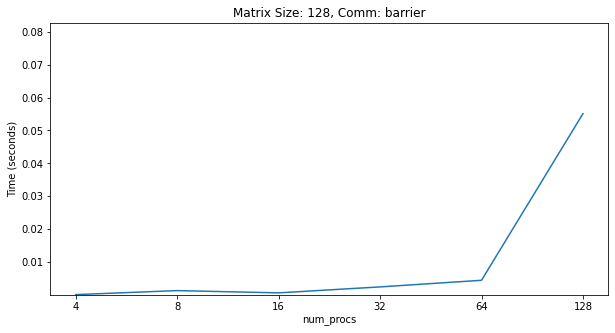

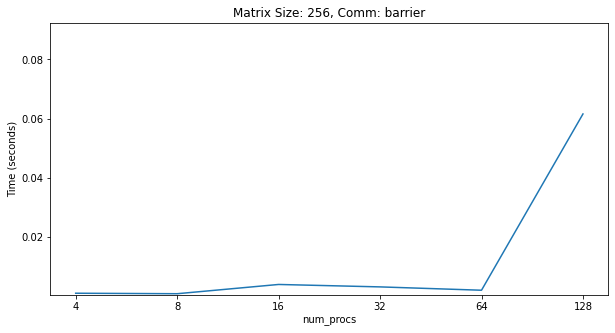

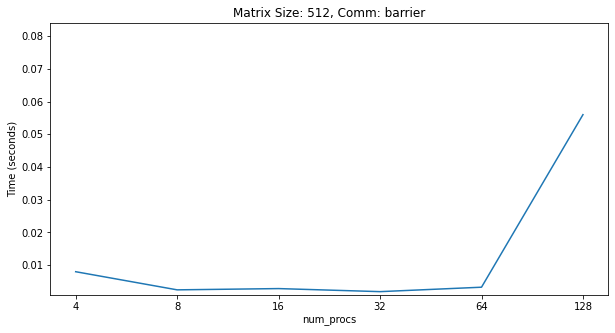

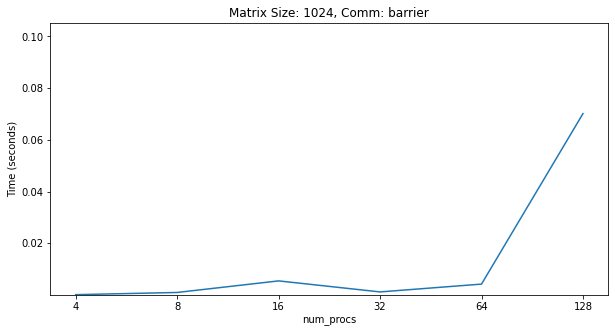

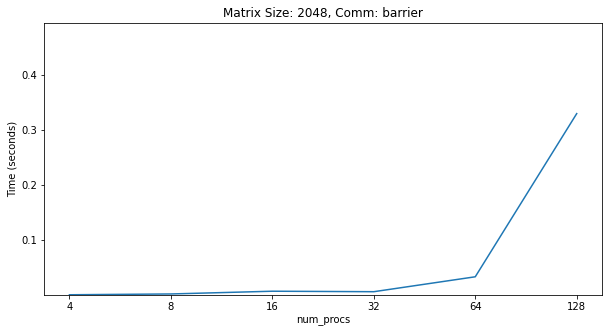

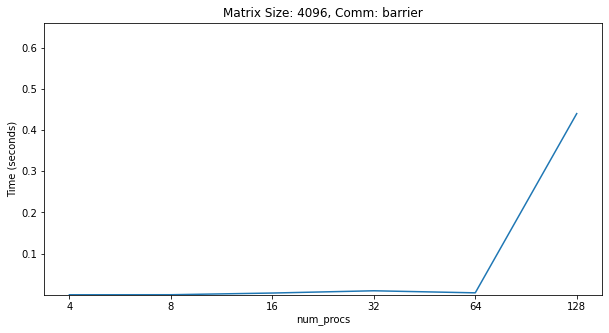

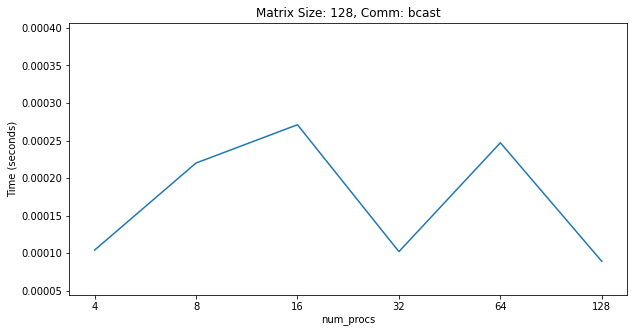

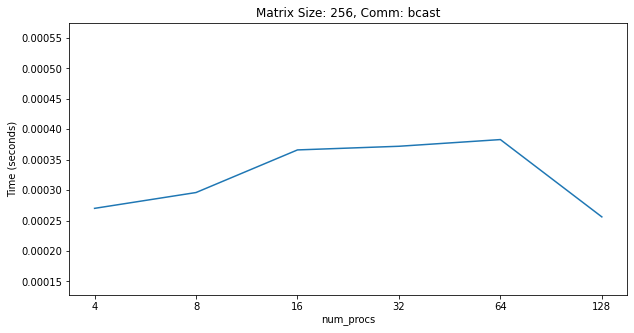

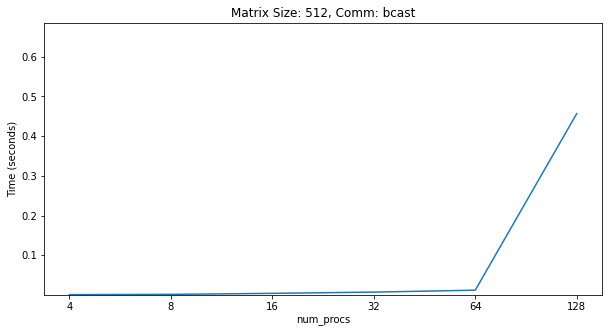

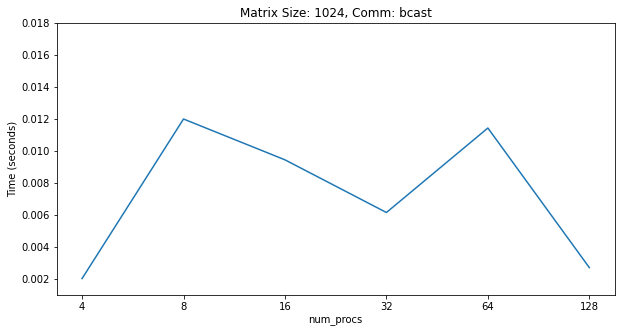

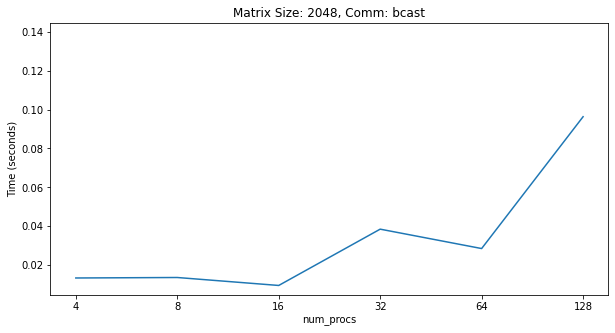

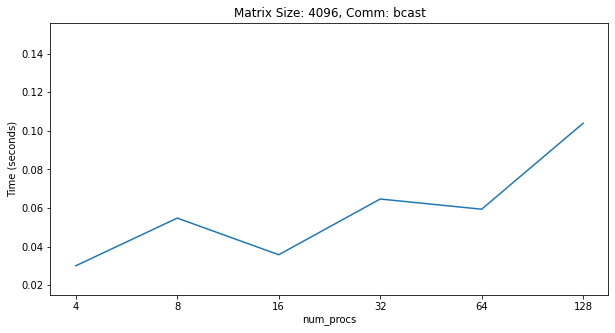

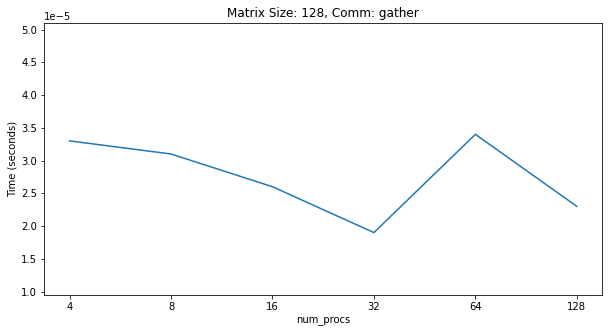

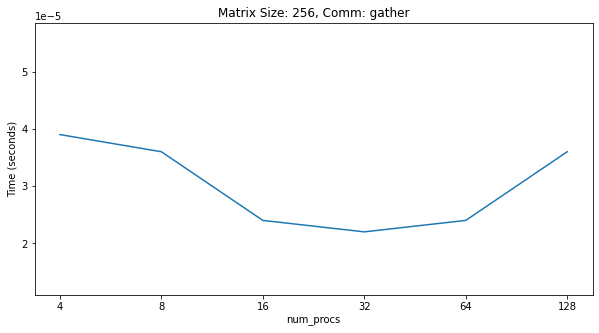

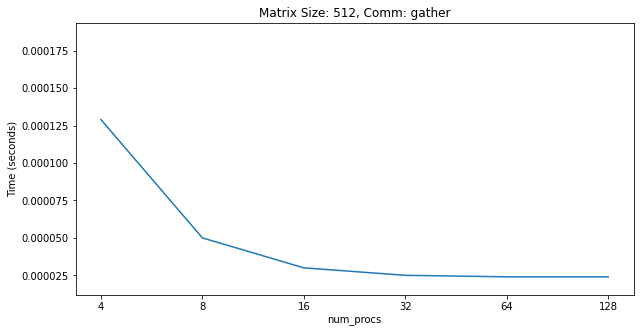

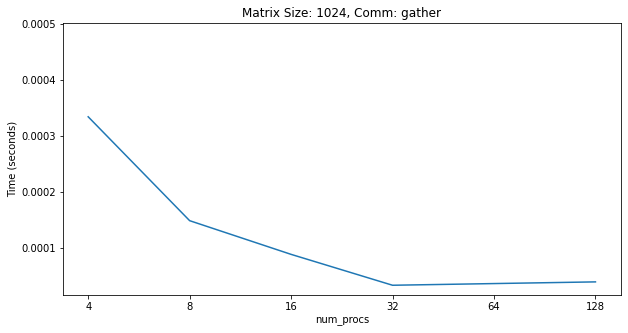

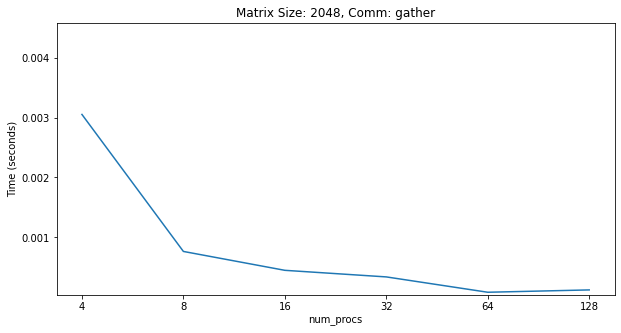

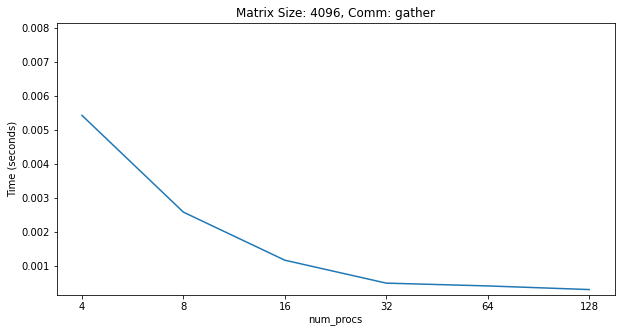

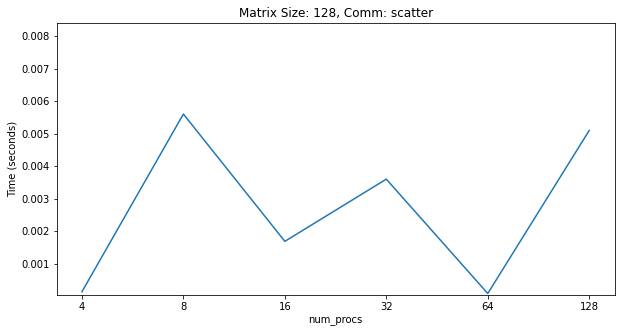

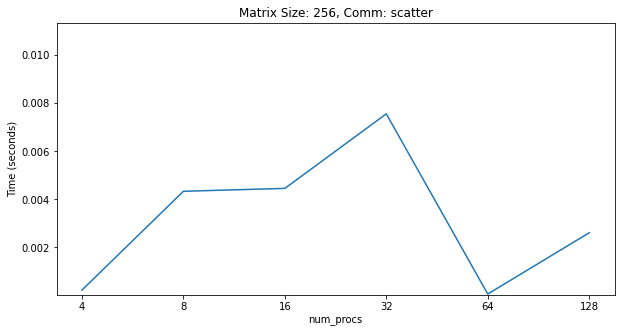

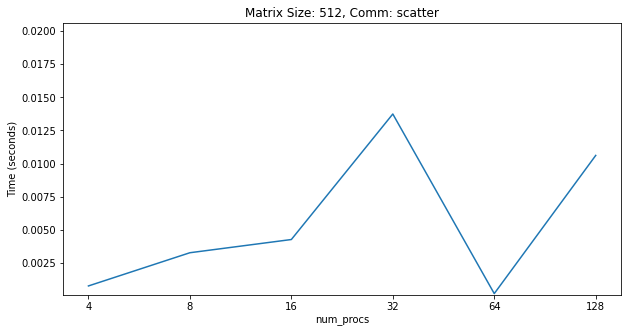

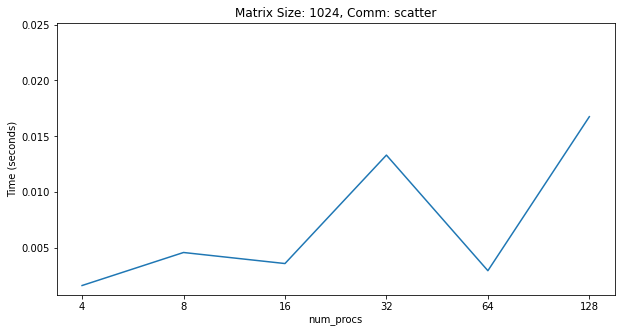

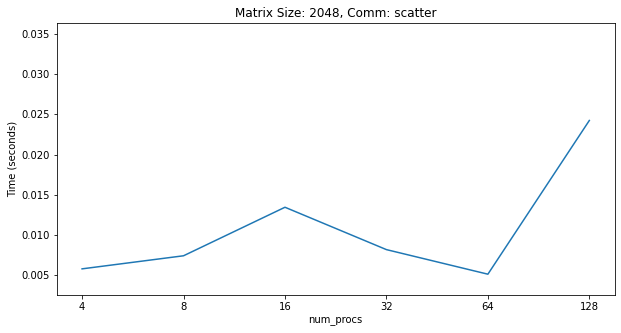

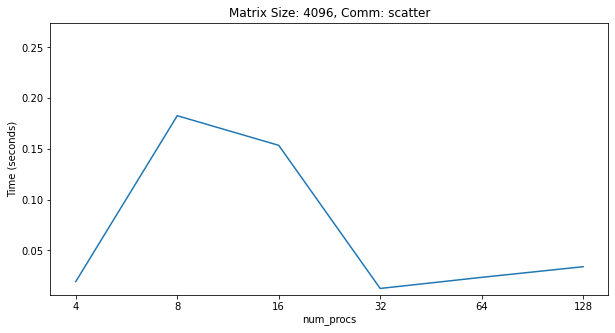

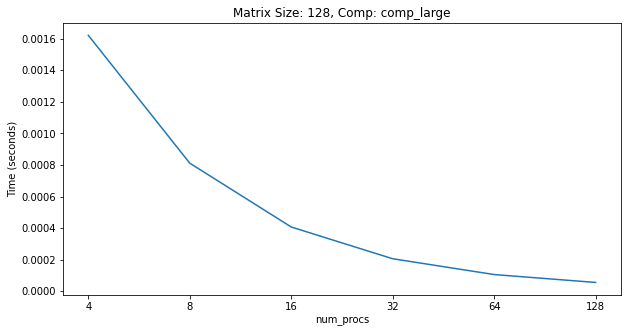

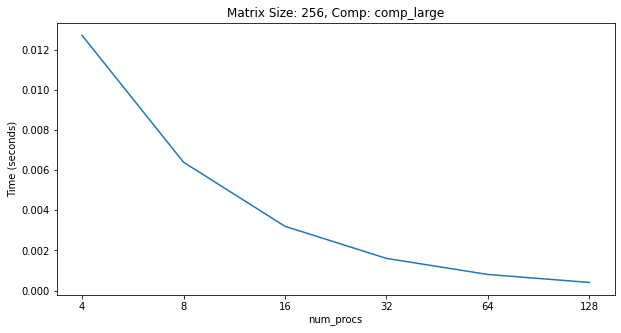

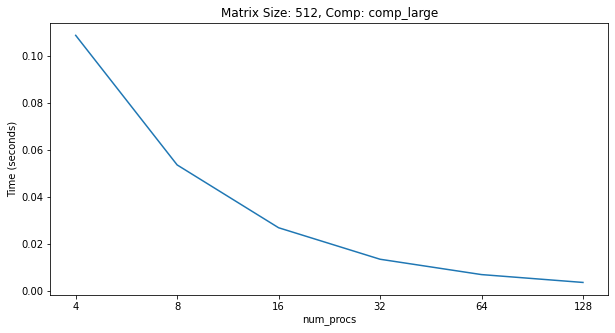

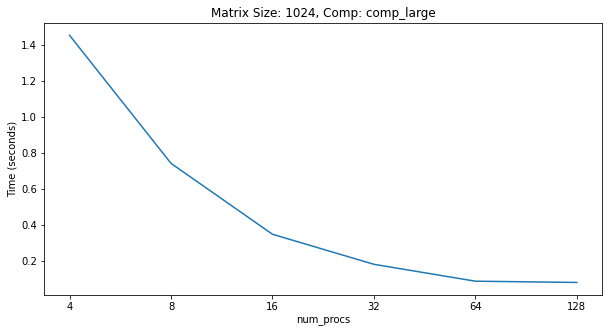

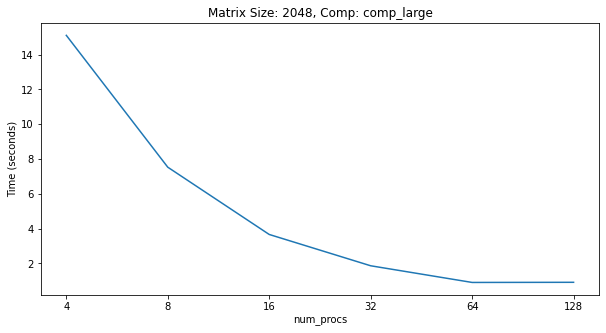

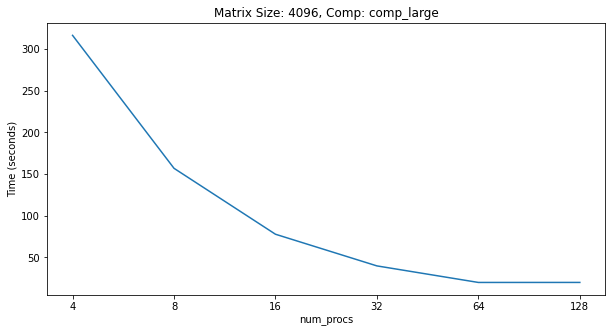

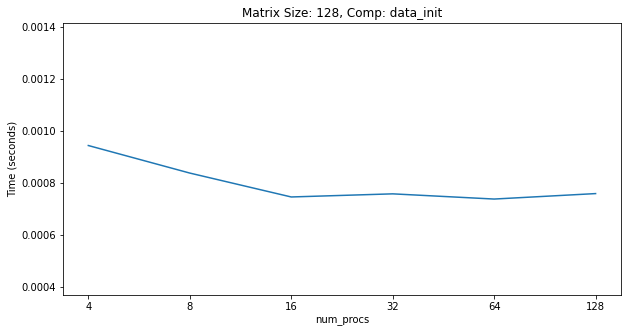

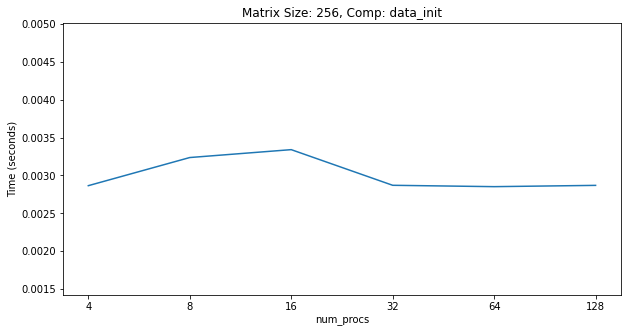

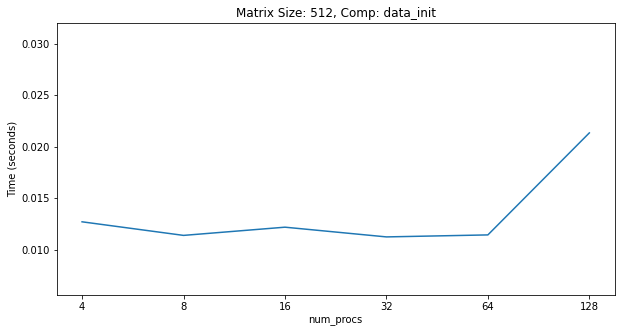

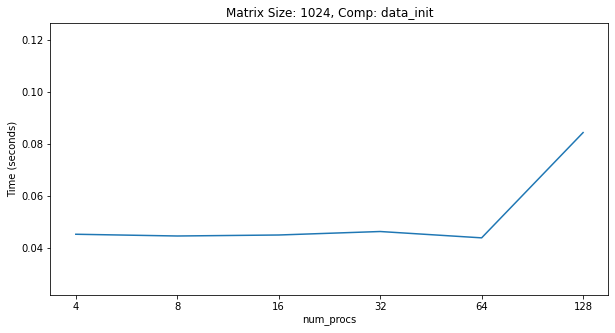

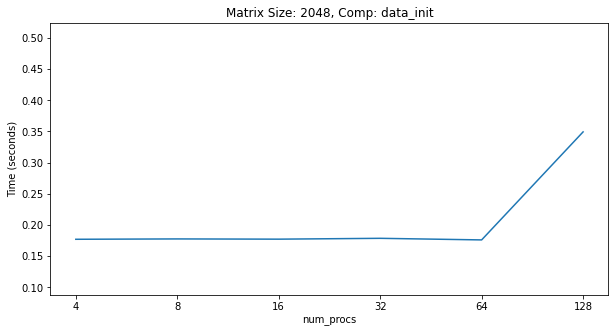

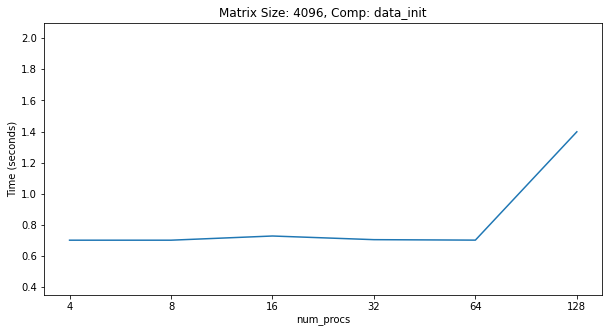

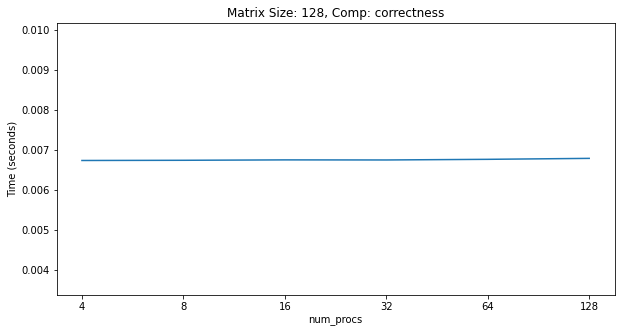

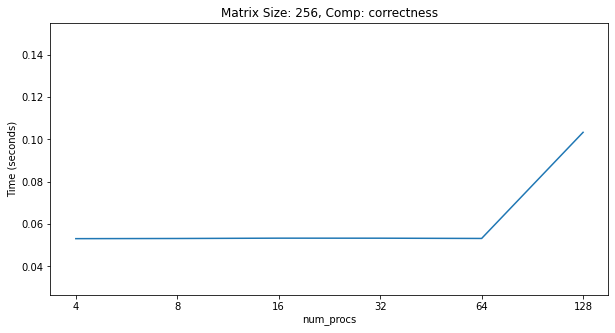

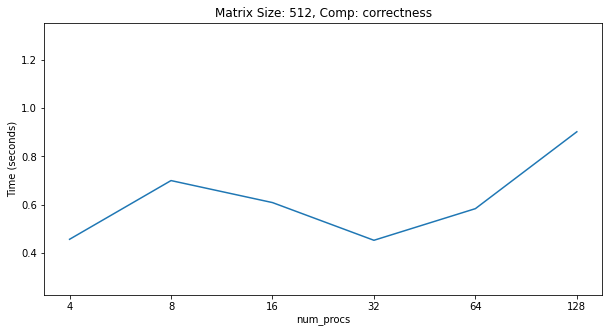

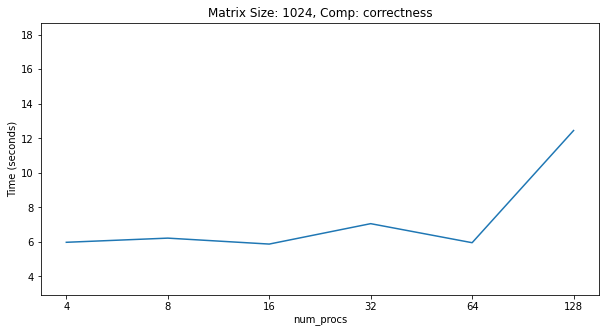

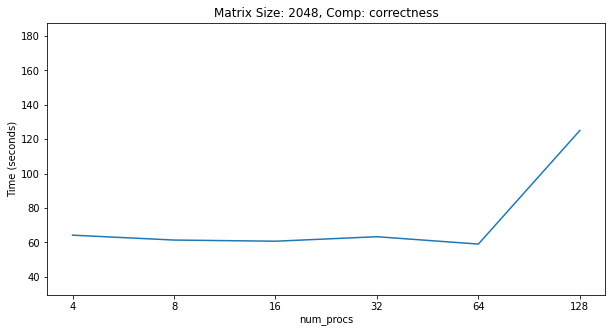

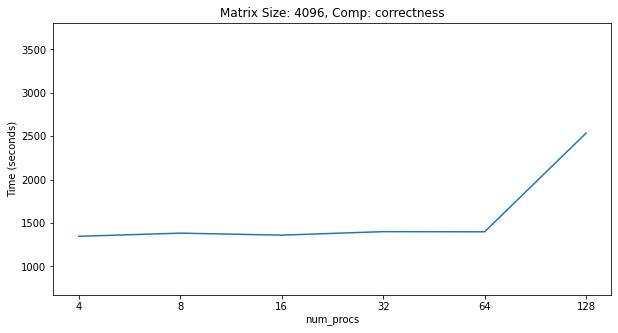

In [13]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = ctk.dataframe

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the communication and computation data series
comm = ["barrier", "bcast", "gather", "scatter"]
comp = ["comp_large", "data_init", "correctness"]

# Loop through matrix sizes and communication data series
for j, data_series in enumerate(comm):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

# Loop through matrix sizes and computation data series
for j, data_series in enumerate(comp):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

In [50]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [46]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [47]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [48]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [49]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )